# 1. Algoritmos de Ordenação
## 1.1. Merge sort

O algoritmo de ordenação por Merge sort é baseado na metodologia de **divisão e conquista**, em que o problema principal é dividido em subproblemas que são resolvidos e, posteriormente, agrupados com o intuito de gerar a solução final. A divisão é realizada em $\theta(1)$, ao passo que a conquista é realizada em $\theta(n)$. De maneira geral, a ténica realiza divisões no vetor pela metade, até que um único elemento é obtido. Em seguida, o processo de conquista é realizado, em que os elementos são agrupados de maneira ordenada. A Figura 1 apresenta esse processo, em que os elementos cinza denotam a primeira metade do vetor, e os elementos em azul correspondem ao final da etapa de divisão.
<br><br>

<figure>
<img src="figs/mergesort.png" width="50%" />
<figcaption>Figura 1: Funcionamento da técnica Merge Sort.</figcaption>
</figure>

O algoritmo abaixo implementa a técnica Merge sort, cuja análise de complexidade é dada da seguinte maneira:
* Complexidade de espaço: 2$\theta(n)$
* Complexidade de tempo: $\theta(n\log n)$
* Estável: Sim
* In-place: Não

A complexidade de tempo pode ser calculada por meio do **Teorema Mestre** da seguinte maneira:

\begin{equation}
\tag{1}
\label{e.recurrence_analysis_mergesort_part1}
T(n) =
    \begin{cases}
      1 & \text{se $n=1$}\\
      aT\left(\frac{n}{b}\right) + f(n)& \text{caso contrário.}
    \end{cases}  
\end{equation}

Como pode ser observado, a função `MergeSort` é invocada duas vezes de maneira recursiva, em que cada chamada é realizada em metade do vetor. Desta forma, temos que $a=b=2$. 

Entretanto, falta ainda analisarmos o termo **residual** $f(n)$ da Equação \ref{e.recurrence_analysis_mergesort_part1}, o qual é composto por três laços: (i) o primeiro deles copia a primeira metade do vetor de dados de entrada $A$ para o vetor **auxiliar** $B$ e possui complexidade de tempo $\theta\left(\frac{n}{n}\right)\in\theta(n)$; (ii) o segundo laço copia a segunda metade do vetor $A$ em $B$, porém de maneira invertida, e também possui complexidade de tempo $\theta\left(\frac{n}{n}\right)\in\theta(n)$; e (iii) o último laço copia os elementos de $B$ no vetor de dados de entrada $A$ de maneira ordenada, ou seja, nesta etapa é realizada a junção (*merge*) dos dados, e possui complexidade $\theta(n)$. Desta forma, o termo residual, ou seja, a conquista, possui complexidade $\theta(n)$.

Assim sendo, podemos reescrever a Equação \ref{e.recurrence_analysis_mergesort_part1} da seguinte maneira:

\begin{equation}
\tag{2}
\label{e.recurrence_analysis_mergesort_part2}
T(n) =
    \begin{cases}
      1 & \text{se $n=1$}\\
      2T\left(\frac{n}{2}\right) + n& \text{caso contrário.}
    \end{cases}  
\end{equation}
O termo residual pode ser mapeado para a forma $cn^k$ assumindo $c=k=1$. Desta forma, de acordo com o Teorema Mestre, a complexidade final de tempo do Merge Sort é dada por $\theta(n^k\log_bn)=\theta(n\log n)$.

In [7]:
from matplotlib import pyplot
import numpy
import math
import timeit
import queue
import sys

In [8]:
def MergeSort(A, e, d):
    if (d > e):
        
        #Divisão é realizada em theta(1) *****
        m = math.floor((e+d)/2) 
        MergeSort(A, e, m)
        MergeSort(A, m+1, d)
        # Fim da divisão **********************
        
        # Conquista é realizada em theta(n) ***
        B = numpy.zeros(d+1);
        
        for k in range(0, m+1):
            B[k] = A[k]
        
        j = d
        for k in range(m+1, d+1):
            B[j] = A[k]
            j = j-1
        
        i = e
        j = d
        for k in range(e, d+1):
            if(B[i] < B[j]):
                A[k] = B[i]
                i = i+1
            else:
                A[k] = B[j]
                j = j-1
        # Fim da conquista ********************

 ## 1.2. Quicksort
 
O algoritmo de ordenação Quicksort também é baseado na metodologia de divisão e conquista, em que esta última é realizada em tempo $\theta(1)$, ao passo que o "gargalo" da técnica está justamente na etapa de divisão. O algoritmo faz uso de um elemento denominado **pivô**, e assume que os elementos à **esquerda** deste são menores ou iguais à ele; ao passo que os elementos à sua **direita** são maiores ou iguais ao pivô. Note que, não necessariamente, os elementos que estão à esquerda e à direita estarão ordenados entre si.

Desta forma, a complexidade de tempo do Quicksort depende, necessariamente, da **posição** do pivô durate a execução do algoritmo. Se conseguíssemos garantir que o pivô sempre dividisse o vetor de entrada ao meio, então a a complexidade de ordenação seria igual à do Merge sort, ou seja, $\theta(n\log n)$. Entretanto, essa garantia não é possível de ser assegurada. A Figura 2 apresenta o funcionamento da técnica Quicksort, em que os elementos à esquerda do pivô são representador pela cor cinza, os elementos azuis correspondem aos valores que são maiores ou iguais ao pivô e, finalmente, o pivô está representado em laranja.
<br><br>

<figure>
<img src="figs/quicksort.png" width="27%" />
<figcaption>Figura 2: Funcionamento da técnica Quicksort. Note que este é um exemplo simples, em que as partes cinza e azul encontram-se já ordenadas. Entretanto, como dito anteriormente, não há garantias que isso ocorra. É por este motivo que o algoritmo do Quicksort tem duas chamadas recursivas para cada iteração, isto é, uma chamada para a parte cinza e outra para a cor azul.</figcaption>
</figure>

O algoritmo abaixo implementa a técnica Quicksort, cuja análise de complexidade é dada da seguinte maneira:
* Complexidade de espaço: $\theta(n)$
* Complexidade de tempo: $O(n^2)$, porém sua complexidade no caso médio é de $O(n\log n)$
* Estável: Não
* In-place: Sim


In [63]:
def Quicksort(A, e, d):
    if (d > e):
            p_index = d # o pivot é sempre o elemento mais à direita
            index = Partition(A, e, d, p_index) #função que retorna o novo índice do pivô (elemento laranja)
            Quicksort(A, e, index-1) # executa o Quicksort na parte cinza
            Quicksort(A, index+1, d) # executa o Quicksort na parte laranja

def Partition(A, e, d, p_index):
    pivot = A[p_index]
    tmp_index = d-1
    i = e
    
    while (i <= d):
        if (A[i] > pivot):
            tmp = A[tmp_index]
            A[tmp_index] = pivot
            A[p_index] = A[i]
            A[i] = tmp
            tmp_index = tmp_index-1
            p_index = p_index-1
        else:
            i = i+1
    return i
                      

In [64]:
A = numpy.random.randint(-20, 20, 6)
#A = [7,-1,3,0,4,10]
Quicksort(A, 0, 5)
print(A)

RecursionError: maximum recursion depth exceeded in comparison

Sorting ... 


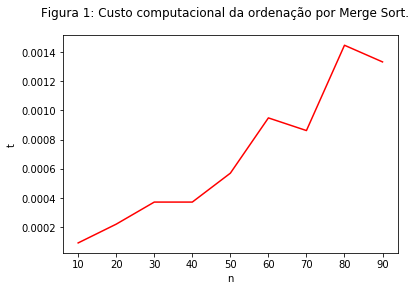

In [28]:
q1 = queue.Queue()
q2 = queue.Queue()

print("Sorting ... ")

for n in range(10,100, 10):
    
    A = numpy.random.randint(-20, 20, n) #gera vetor com números inteiros aleatórios

    start = timeit.default_timer()
    MergeSort(A, 0, n-1)
    stop = timeit.default_timer()
    execution_time = stop - start
    
    q1.put(execution_time)
    q2.put(n)

y = numpy.zeros(q1.qsize())
i = 0
while not q1.empty():
    y[i] = q1.get();
    i = i+1;

x = numpy.zeros(q2.qsize())
i = 0
while not q2.empty():
    x[i] = q2.get();
    i = i+1;

# plotando o gráfico
pyplot.plot(x,y, color = "red")
pyplot.xlabel("n")
pyplot.ylabel("t")
pyplot.suptitle("Figura 1: Custo computacional da ordenação por Merge Sort.")
pyplot.show()